In [1]:
import igraph as ig
import numpy as np
from numpy.linalg import norm
import random
import pandas as pd
import scipy.io
import time
from IPython.display import display, clear_output
from operator import itemgetter
import matplotlib.pyplot as plt
import cairo
from SOINN import SF_SOINN

In [2]:
def train_phase(model, data, labels):
    # for plotting
    xs = []
    n_nodes = []
    n_edges = []
    n_del_nodes = []
    n_del_edges = []

    start_time = time.time()

    for index, row in data.iterrows():
        model.input_signal(x=row.values, y=labels[index], learning=True)

        # print completed percentage
        percent_completed = round((index / len(data))*100, 2)
        if index % 100 == 0 or index == len(data):
            clear_output(wait=True)
            print(f'Processing input {index}: {percent_completed}% completed')
            # for plotting
            n_nodes.append(model.network.vcount())
            n_edges.append(model.network.ecount())
            n_del_nodes.append(model.n_del_nodes)
            n_del_edges.append(model.n_del_edges)
            xs.append(index)

    finish_time = round(time.time() - start_time)
    mins = round(finish_time / 60)
    secs = finish_time % 60
    clear_output(wait=True)
    print(f'Training time: {mins} min {secs} sec')
    print(f'Inputs processed: {index}')

    print(f'Number of nodes: {model.network.vcount()}')
    print(f'Number of edges: {model.network.ecount()}')

    return xs, n_nodes, n_edges, n_del_nodes, n_del_edges

It is possible to load different datasets in the `read_pickle` function:
- `stm.pkl`
- `stmn.pkl`
- `moons_noise01.pkl`
- `moons_noise02.pkl`
- `moons_noise03.pkl`
- `spirals.pkl`

In [7]:
df = pd.read_pickle('./test-data/stmn.pkl')

In [8]:
y_train = df['class']
x_train = df[['x', 'y']]

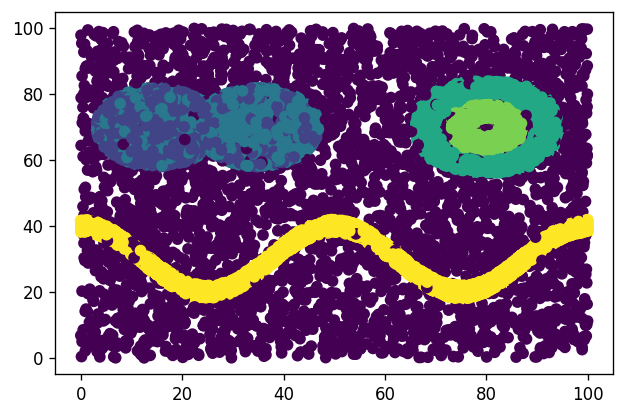

In [5]:
# data visualization before
dpi = 120
width = 720/dpi
height = 480/dpi

plt.figure(figsize=(width, height), dpi=dpi)
plt.scatter(df['x'], df['y'], c=df['class'])
#plt.show()
# save plot as png (disable previous line first)
plt.savefig('./data.png')

In [10]:
# initialization and training
rand_int = random.randint(1, len(x_train) - 1)
x1 = x_train.iloc[rand_int].values
rand_int = random.randint(1, len(x_train) - 1)
x2 = x_train.iloc[rand_int].values
rand_int = random.randint(1, len(x_train) - 1)
x3 = x_train.iloc[rand_int].values

s = SF_SOINN.SF_SOINN(x1, x2, x3, max_edge_age=20, iter_lambda=20)

xs, n_nodes, n_edges, n_del_nodes, n_del_edges = train_phase(model=s, data=x_train, labels=y_train)

Training time: 0 min 30 sec
Inputs processed: 38884
Number of nodes: 102
Number of edges: 119


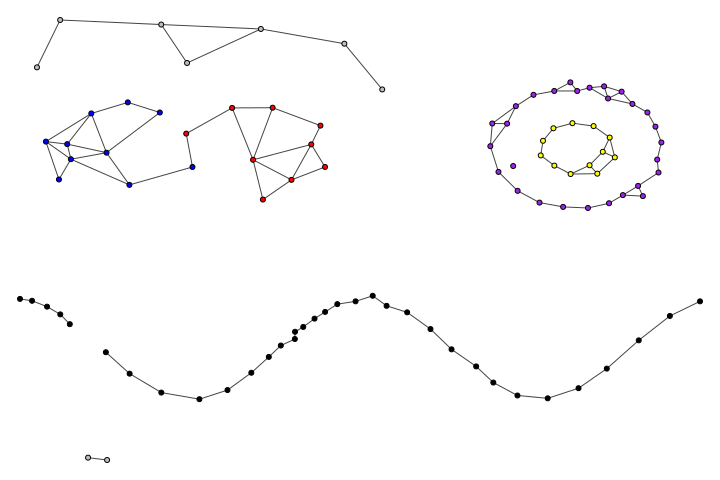

In [11]:
# visualization of the created network
width = 720
height = 480

coordinates = []
for n in s.network.vs:
    coordinates.append([n['w'][0], 100 - n['w'][1]])

l = s.network.layout()
l = ig.Layout(coordinates, dim=2)
#l.rotate(angle=180)

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
ctx = cairo.Context(surface)
ctx.scale(width, height)
ctx.rectangle(0, 0, 1, 1)
ctx.set_source_rgba(0,0,0,0)
ctx.fill()

color_dict = {0.0: 'gray', 1.0: 'blue', 2.0: 'red', 3.0: 'purple', 4.0: 'yellow', 5.0: 'black', 'noise': 'green'}

#ig.plot(s.network, surface, bbox=(width, height), layout=l, vertex_size=5, vertex_color=[color_dict[c] for c in s.network.vs['c']])
# to save on disk
ig.plot(s.network, 'net.png', bbox=(width, height), layout=l, vertex_size=5, vertex_color=[color_dict[c] for c in s.network.vs['c']])